In [67]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [69]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [70]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [71]:
tf.keras.backend.clear_session()

In [72]:
subject = 'Maranhão - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [73]:
data = pd.read_csv('2003_raw_Maranhão_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Maranhão - PIB - Per Capita,Maranhão - PIB - Preços de Mercado,Maranhão - PIB - Estadual,Maranhão - PIB - Construção Civil,Maranhão - População,Maranhão - INCC (%),Maranhão - IPCA - Variação mensal durante o Plano Real (%),Maranhão - IGP-DI,Maranhão - Taxa Selic (%),Maranhão - IDH - Longevidade,Maranhão - IDH - Renda,Maranhão - IDH - Educação,Maranhão - NFSP - Fluxo Mensal (Milhões de reais),Maranhão - Estoque liquido de capital fixo - (R$),Maranhão - Desemprego,Maranhão - Produção de Cimento (t),Maranhão - Valor,Maranhão - Consumo de Cimento (t)
0,2003-01-01,2.306007e+06,1.213850e+06,0.397367,2.598598e+06,5803224.0,1.70,12.53,2.70,0.082293,0.649,0.531,0.312,3.46,6.098524e+06,5.929567,NaN,0.38,43342.0
1,2003-02-01,2.306007e+06,1.213850e+06,0.397367,2.598598e+06,5803224.0,1.51,2.25,2.17,0.088771,0.649,0.531,0.312,3.59,6.172460e+06,5.929567,NaN,0.39,28663.0
2,2003-03-01,2.306007e+06,1.213850e+06,0.397367,2.598598e+06,5803224.0,1.39,3.86,1.59,0.090733,0.649,0.531,0.312,3.84,6.172460e+06,5.929567,43382.0,0.39,27900.0
3,2003-04-01,2.306007e+06,1.213850e+06,0.397367,2.598598e+06,5803224.0,1.38,5.13,1.66,0.092749,0.649,0.531,0.312,3.95,6.172460e+06,5.929567,60687.0,0.40,25739.0
4,2003-05-01,2.306007e+06,1.213850e+06,0.397367,2.598598e+06,5803224.0,0.90,6.15,0.41,0.092758,0.649,0.531,0.312,4.06,6.172460e+06,5.929567,106506.0,0.40,30203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,4.295840e+06,7.248554e+06,0.610634,2.312154e+06,7035055.0,0.58,2.42,-0.01,0.024620,0.760,0.620,0.680,0.69,7.827728e+06,12.300000,179318.0,0.51,70773.0
200,2019-09-01,4.295840e+06,7.248554e+06,0.610634,2.312154e+06,7035055.0,0.42,2.54,-0.51,0.022751,0.760,0.620,0.680,0.62,7.827728e+06,12.000000,22608.0,0.51,67010.0
201,2019-10-01,4.295840e+06,7.248554e+06,0.610634,2.312154e+06,7035055.0,0.46,2.49,0.50,0.022035,0.760,0.620,0.680,0.59,7.827728e+06,11.900000,249484.0,0.51,81128.0
202,2019-11-01,4.295840e+06,7.248554e+06,0.610634,2.312154e+06,7035055.0,0.18,2.60,0.55,0.020790,0.760,0.620,0.680,0.57,7.827728e+06,11.700000,14612.0,0.51,81737.0


In [74]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      56.124
1      39.810
2      44.937
3      41.661
4      47.350
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Maranhão - Consumo de Cimento (t), Length: 204, dtype: float64

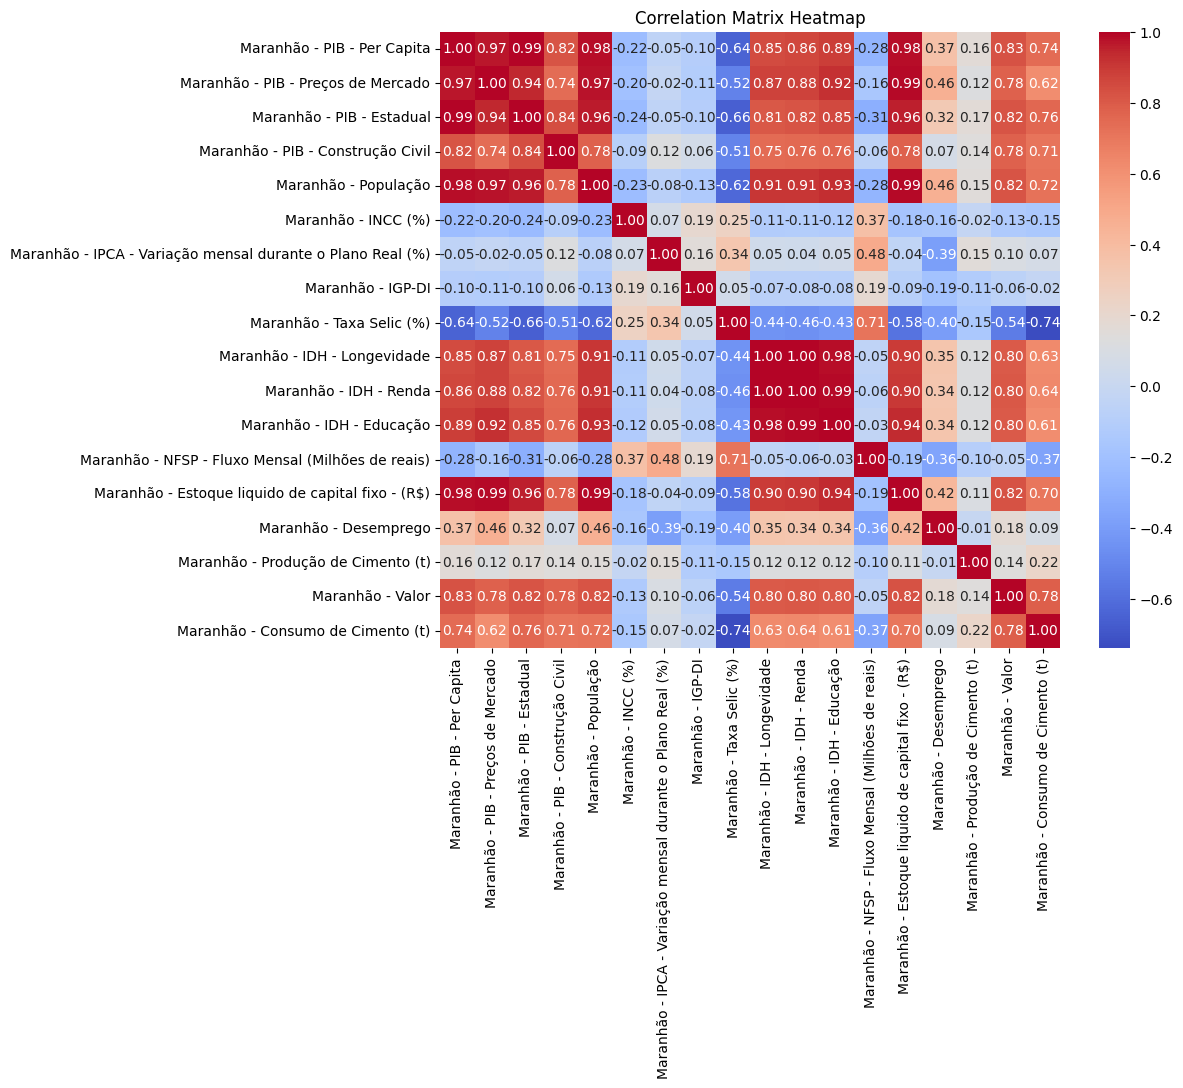

In [75]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [76]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Maranhão - PIB - Per Capita,Maranhão - PIB - Preços de Mercado,Maranhão - PIB - Estadual,Maranhão - PIB - Construção Civil,Maranhão - População,Maranhão - INCC (%),Maranhão - IPCA - Variação mensal durante o Plano Real (%),Maranhão - IGP-DI,Maranhão - Taxa Selic (%),Maranhão - IDH - Longevidade,Maranhão - IDH - Renda,Maranhão - IDH - Educação,Maranhão - NFSP - Fluxo Mensal (Milhões de reais),Maranhão - Estoque liquido de capital fixo - (R$),Maranhão - Desemprego,Maranhão - Produção de Cimento (t),Maranhão - Valor
0,-1.662960,-1.340232,-1.706115,-0.615674,-1.630976,1.998868,4.052332,3.466715,2.303195,-0.931808,-0.934397,-0.921111,3.108599,-1.539424,-1.535322,-1.000000,-0.821433
1,-1.662960,-1.340232,-1.706115,-0.615674,-1.630976,1.647487,-0.596188,2.630940,2.745235,-0.931808,-0.934397,-0.921111,3.275709,-1.411460,-1.535322,-1.000000,-0.696493
2,-1.662960,-1.340232,-1.706115,-0.615674,-1.630976,1.425561,0.131839,1.716318,2.879123,-0.931808,-0.934397,-0.921111,3.597074,-1.411460,-1.535322,-0.658524,-0.696493
3,-1.662960,-1.340232,-1.706115,-0.615674,-1.630976,1.407068,0.706121,1.826703,3.016721,-0.931808,-0.934397,-0.921111,3.738475,-1.411460,-1.535322,-0.598158,-0.571554
4,-1.662960,-1.340232,-1.706115,-0.615674,-1.630976,0.519367,1.167355,-0.144465,3.017322,-0.931808,-0.934397,-0.921111,3.879875,-1.411460,-1.535322,-0.438326,-0.571554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.191852,1.776414,1.029620,-0.016037,1.439983,-0.590259,-0.966985,-1.264088,-0.729479,1.190573,1.235030,1.379524,-0.374997,1.441346,3.249809,-0.228948,0.677841
176,1.191852,1.776414,1.029620,-0.016037,1.439983,-0.479297,-0.881068,-0.412544,-0.941281,1.190573,1.235030,1.379524,-0.439270,1.441346,3.249809,-0.714327,0.677841
177,1.191852,1.776414,1.029620,-0.016037,1.439983,-1.034110,-0.808718,0.186692,-1.140710,1.190573,1.235030,1.379524,-0.503543,1.441346,3.249809,-0.225136,0.677841
178,1.191852,1.776414,1.029620,-0.016037,1.439983,-0.571766,-0.614276,-0.633314,-1.226481,1.190573,1.235030,1.379524,-0.503543,1.441346,3.329957,-0.774250,0.677841


In [77]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Maranhão - PIB - Per Capita,Maranhão - PIB - Preços de Mercado,Maranhão - PIB - Estadual,Maranhão - PIB - Construção Civil,Maranhão - População,Maranhão - INCC (%),Maranhão - IPCA - Variação mensal durante o Plano Real (%),Maranhão - IGP-DI,Maranhão - Taxa Selic (%),Maranhão - IDH - Longevidade,Maranhão - IDH - Renda,Maranhão - IDH - Educação,Maranhão - NFSP - Fluxo Mensal (Milhões de reais),Maranhão - Estoque liquido de capital fixo - (R$),Maranhão - Desemprego,Maranhão - Produção de Cimento (t),Maranhão - Valor
0,-1.66296,-1.340232,-1.706115,-0.615674,-1.630976,1.998868,4.052332,3.466715,2.303195,-0.931808,-0.934397,-0.921111,3.108599,-1.539424,-1.535322,-1.000000,-0.821433
1,-1.66296,-1.340232,-1.706115,-0.615674,-1.630976,1.647487,-0.596188,2.630940,2.745235,-0.931808,-0.934397,-0.921111,3.275709,-1.411460,-1.535322,-1.000000,-0.696493
2,-1.66296,-1.340232,-1.706115,-0.615674,-1.630976,1.425561,0.131839,1.716318,2.879123,-0.931808,-0.934397,-0.921111,3.597074,-1.411460,-1.535322,-0.658524,-0.696493
3,-1.66296,-1.340232,-1.706115,-0.615674,-1.630976,1.407068,0.706121,1.826703,3.016721,-0.931808,-0.934397,-0.921111,3.738475,-1.411460,-1.535322,-0.598158,-0.571554
4,-1.66296,-1.340232,-1.706115,-0.615674,-1.630976,0.519367,1.167355,-0.144465,3.017322,-0.931808,-0.934397,-0.921111,3.879875,-1.411460,-1.535322,-0.438326,-0.571554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.15719,1.468884,1.047284,0.858388,1.307104,-0.238878,0.629248,-1.406012,0.272188,1.190573,1.040025,1.250997,0.794771,1.416222,0.845395,-1.000000,0.427962
164,1.15719,1.468884,1.047284,0.858388,1.307104,-0.608753,0.837256,-0.112926,0.272188,1.190573,1.040025,1.250997,0.730498,1.416222,0.925542,-1.000000,0.552901
165,1.15719,1.468884,1.047284,0.858388,1.307104,-0.534778,0.877953,-0.743700,0.272188,1.190573,1.040025,1.250997,0.743353,1.416222,1.005689,-1.000000,0.552901
166,1.15719,1.468884,1.047284,0.858388,1.307104,-0.756703,1.000045,-0.586006,0.248413,1.190573,1.040025,1.250997,0.614807,1.416222,1.005689,-1.000000,0.677841


In [78]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      56.124
1      39.810
2      44.937
3      41.661
4      47.350
        ...  
163    73.445
164    69.471
165    83.004
166    77.332
167    58.591
Name: Maranhão - Consumo de Cimento (t), Length: 168, dtype: float64

In [79]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [80]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [81]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Maranhão - PIB - Per Capita,Maranhão - PIB - Preços de Mercado,Maranhão - PIB - Estadual,Maranhão - PIB - Construção Civil,Maranhão - População,Maranhão - INCC (%),Maranhão - IPCA - Variação mensal durante o Plano Real (%),Maranhão - IGP-DI,Maranhão - Taxa Selic (%),Maranhão - IDH - Longevidade,Maranhão - IDH - Renda,Maranhão - IDH - Educação,Maranhão - NFSP - Fluxo Mensal (Milhões de reais),Maranhão - Estoque liquido de capital fixo - (R$),Maranhão - Desemprego,Maranhão - Produção de Cimento (t),Maranhão - Valor
132,1.136346,0.969616,1.161801,1.016466,1.013727,-0.960135,1.058830,0.297077,-0.755853,0.999368,1.040025,1.186734,-0.285015,0.834026,-0.436959,2.053263,2.052175
133,1.136346,0.969616,1.161801,1.016466,1.013727,0.482379,-1.364912,-0.160234,-0.688658,0.999368,1.040025,1.186734,-0.349288,1.129318,-0.036224,-1.000000,1.427477
134,1.136346,0.969616,1.161801,1.016466,1.013727,-0.534778,-1.052901,0.549386,-0.626634,0.999368,1.040025,1.186734,-0.374997,1.129318,0.204218,-0.620906,1.177598
135,1.136346,0.969616,1.161801,1.016466,1.013727,-0.627247,-0.627842,1.542855,-0.571481,0.999368,1.040025,1.186734,-0.259306,1.129318,0.043923,-1.000000,1.177598
136,1.136346,0.969616,1.161801,1.016466,1.013727,0.482379,-0.320352,-0.081387,-0.516512,0.999368,1.040025,1.186734,-0.053632,1.129318,-0.116371,-1.000000,1.177598
137,1.136346,0.969616,1.161801,1.016466,1.013727,2.646150,-0.107822,-1.500628,-0.510405,0.999368,1.040025,1.186734,0.023495,1.129318,-0.276665,-1.000000,1.677356
138,1.136346,0.969616,1.161801,1.016466,1.013727,0.075516,0.082098,-1.784477,-0.510405,0.999368,1.040025,1.186734,-0.002214,1.129318,-0.356812,3.206681,1.802296
139,1.136346,0.969616,1.161801,1.016466,1.013727,0.241960,0.086620,-1.658322,-0.510405,0.999368,1.040025,1.186734,-0.143614,1.129318,-0.517107,-1.000000,0.677841
140,1.136346,0.969616,1.161801,1.016466,1.013727,-0.997122,0.204189,-0.696392,-0.510054,0.999368,1.040025,1.186734,-0.182178,1.129318,-0.677401,-1.000000,2.426993
141,1.136346,0.969616,1.161801,1.016466,1.013727,-0.867666,0.470982,-0.759469,-0.510405,0.999368,1.040025,1.186734,-0.105051,1.129318,-0.837695,-1.000000,2.052175


In [82]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [83]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [84]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [85]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [86]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1448988655, 3292080470, 2463177698, 3155564077, 2514119992, 37288666, 3784018829, 272935761, 2267731483, 2763750882]


Step: 0 ___________________________________________
val_loss: 117.81269836425781
winner_seed: 1448988655


Step: 1 ___________________________________________
val_loss: 173.88992309570312


Step: 2 ___________________________________________
val_loss: 204.66578674316406


Step: 3 ___________________________________________
val_loss: 80.94129943847656
winner_seed: 3155564077


Step: 4 ___________________________________________
val_loss: 232.0214385986328


Step: 5 ___________________________________________
val_loss: 224.14852905273438


Step: 6 ___________________________________________
val_loss: 170.08267211914062


Step: 7 ___________________________________________
val_loss: 129.99732971191406


Step: 8 ___________________________________________
val_loss: 276.0057067871094


Step: 9 ___________________________________________
val_loss: 140.64744567871094


final

In [87]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 394904081

Epoch 1/10000
4/4 [==============================] - 2s 113ms/step - loss: 8859.1152 - val_loss: 2578.6833
Epoch 2/10000
4/4 [==============================] - 0s 7ms/step - loss: 684.0457 - val_loss: 3103.2400
Epoch 3/10000
4/4 [==============================] - 0s 7ms/step - loss: 722.1672 - val_loss: 2716.6516
Epoch 4/10000
4/4 [==============================] - 0s 7ms/step - loss: 677.9714 - val_loss: 1947.7520
Epoch 5/10000
4/4 [==============================] - 0s 7ms/step - loss: 670.0616 - val_loss: 3206.0786
Epoch 6/10000
4/4 [==============================] - 0s 7ms/step - loss: 689.0249 - val_loss: 1442.7687
Epoch 7/10000
4/4 [==============================] - 0s 7ms/step - loss: 746.7435 - val_loss: 2008.5178
Epoch 8/10000
4/4 [==============================] - 0s 7ms/step - loss: 757.3687 - val_loss: 1491.7887
Epoch 9/10000
4/4 [==============================] - 0s 7ms/step - loss: 665.8942 - val_loss: 2116.3889
Epoch 10/10000
4/4 [==============================] - 0s 7ms/

4/4 [==============================] - 0s 7ms/step - loss: 279.2635 - val_loss: 193.8686
Epoch 80/10000
4/4 [==============================] - 0s 7ms/step - loss: 239.7250 - val_loss: 199.8344
Epoch 81/10000
4/4 [==============================] - 0s 7ms/step - loss: 227.2837 - val_loss: 271.0830
Epoch 82/10000
4/4 [==============================] - 0s 8ms/step - loss: 242.4248 - val_loss: 260.1229
Epoch 83/10000
4/4 [==============================] - 0s 9ms/step - loss: 271.2671 - val_loss: 206.3199
Epoch 84/10000
4/4 [==============================] - 0s 7ms/step - loss: 286.3705 - val_loss: 303.6555
Epoch 85/10000
4/4 [==============================] - 0s 7ms/step - loss: 507.7617 - val_loss: 324.7540
Epoch 86/10000
4/4 [==============================] - 0s 7ms/step - loss: 290.7684 - val_loss: 234.7758
Epoch 87/10000
4/4 [==============================] - 0s 7ms/step - loss: 213.8252 - val_loss: 187.2563
Epoch 88/10000
4/4 [==============================] - 0s 7ms/step - loss: 276.7

4/4 [==============================] - 0s 7ms/step - loss: 102.3633 - val_loss: 334.7746
Epoch 158/10000
4/4 [==============================] - 0s 7ms/step - loss: 113.6544 - val_loss: 276.5015
Epoch 159/10000
4/4 [==============================] - 0s 7ms/step - loss: 84.0497 - val_loss: 276.5858
Epoch 160/10000
4/4 [==============================] - 0s 7ms/step - loss: 82.7891 - val_loss: 270.4865
Epoch 161/10000
4/4 [==============================] - 0s 7ms/step - loss: 95.3163 - val_loss: 237.0050
Epoch 162/10000
4/4 [==============================] - 0s 7ms/step - loss: 162.6095 - val_loss: 239.0363
Epoch 163/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.7961 - val_loss: 262.4217
Epoch 164/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.7161 - val_loss: 231.1458
Epoch 165/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.4925 - val_loss: 230.3211
Epoch 166/10000
4/4 [==============================] - 0s 7ms/step - loss: 15

Epoch 236/10000
4/4 [==============================] - 0s 7ms/step - loss: 72.2692 - val_loss: 129.6212
Epoch 237/10000
4/4 [==============================] - 0s 7ms/step - loss: 65.9214 - val_loss: 151.7903
Epoch 238/10000
4/4 [==============================] - 0s 7ms/step - loss: 64.0483 - val_loss: 144.1722
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 57.8302 - val_loss: 145.1188
Epoch 240/10000
4/4 [==============================] - 0s 7ms/step - loss: 66.0728 - val_loss: 183.6402
Epoch 241/10000
4/4 [==============================] - 0s 7ms/step - loss: 61.6855 - val_loss: 127.1063
Epoch 242/10000
4/4 [==============================] - 0s 7ms/step - loss: 95.2116 - val_loss: 137.9859
Epoch 243/10000
4/4 [==============================] - 0s 8ms/step - loss: 62.9576 - val_loss: 203.8524
Epoch 244/10000
4/4 [==============================] - 0s 8ms/step - loss: 68.3342 - val_loss: 196.0547
Epoch 245/10000
4/4 [==============================] - 0s 8ms/st

Epoch 315/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.5620 - val_loss: 181.1723
Epoch 316/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.3827 - val_loss: 197.6875
Epoch 317/10000
4/4 [==============================] - 0s 8ms/step - loss: 73.8800 - val_loss: 134.4777
Epoch 318/10000
4/4 [==============================] - 0s 8ms/step - loss: 42.3126 - val_loss: 137.8623
Epoch 319/10000
4/4 [==============================] - 0s 7ms/step - loss: 50.4709 - val_loss: 182.0041
Epoch 320/10000
4/4 [==============================] - 0s 7ms/step - loss: 47.2305 - val_loss: 194.9617
Epoch 321/10000
4/4 [==============================] - 0s 7ms/step - loss: 50.2578 - val_loss: 211.1203
Epoch 322/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.1399 - val_loss: 213.8824
Epoch 323/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.1303 - val_loss: 190.7716
Epoch 324/10000
4/4 [==============================] - 0s 7ms/st

Epoch 394/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.3305 - val_loss: 214.1539
Epoch 395/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.3910 - val_loss: 227.4920
Epoch 396/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.9787 - val_loss: 194.5026
Epoch 397/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.5393 - val_loss: 226.8061
Epoch 398/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.2608 - val_loss: 171.1642
Epoch 399/10000
4/4 [==============================] - 0s 7ms/step - loss: 39.5798 - val_loss: 183.6693
Epoch 400/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.6170 - val_loss: 158.0734
Epoch 401/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.1623 - val_loss: 184.6227
Epoch 402/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.8070 - val_loss: 200.4472
Epoch 403/10000
4/4 [==============================] - 0s 7ms/st

Epoch 473/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.5053 - val_loss: 141.1783
Epoch 474/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.1825 - val_loss: 116.4531
Epoch 475/10000
4/4 [==============================] - 0s 7ms/step - loss: 32.8141 - val_loss: 121.6187
Epoch 476/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.4282 - val_loss: 119.4725
Epoch 477/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.7378 - val_loss: 126.2628
Epoch 478/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.1201 - val_loss: 134.6070
Epoch 479/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.6556 - val_loss: 116.2112
Epoch 480/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.2775 - val_loss: 121.7113
Epoch 481/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.0961 - val_loss: 127.4776
Epoch 482/10000
4/4 [==============================] - 0s 7ms/st

Epoch 552/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.8901 - val_loss: 131.2738
Epoch 553/10000
4/4 [==============================] - 0s 8ms/step - loss: 32.0104 - val_loss: 119.2942
Epoch 554/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.9138 - val_loss: 117.0196
Epoch 555/10000
4/4 [==============================] - 0s 7ms/step - loss: 39.6182 - val_loss: 141.0553
Epoch 556/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.0627 - val_loss: 138.8672
Epoch 557/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.5347 - val_loss: 137.3043
Epoch 558/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.2668 - val_loss: 148.0690
Epoch 559/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.3193 - val_loss: 113.2522
Epoch 560/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.5916 - val_loss: 132.3363
Epoch 561/10000
4/4 [==============================] - 0s 7ms/st

Epoch 631/10000
4/4 [==============================] - 0s 8ms/step - loss: 31.1518 - val_loss: 114.5073
Epoch 632/10000
4/4 [==============================] - 0s 8ms/step - loss: 25.8386 - val_loss: 116.0478
Epoch 633/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.3427 - val_loss: 116.0790
Epoch 634/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.6852 - val_loss: 123.6743
Epoch 635/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.4659 - val_loss: 107.8516
Epoch 636/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.5957 - val_loss: 110.4202
Epoch 637/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.4921 - val_loss: 121.2058
Epoch 638/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.3730 - val_loss: 112.6260
Epoch 639/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.4605 - val_loss: 122.1345
Epoch 640/10000
4/4 [==============================] - 0s 7ms/st

Epoch 710/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.6600 - val_loss: 116.4676
Epoch 711/10000
4/4 [==============================] - 0s 8ms/step - loss: 25.9040 - val_loss: 89.3634
Epoch 712/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.1464 - val_loss: 100.9254
Epoch 713/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.9450 - val_loss: 119.2901
Epoch 714/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.8457 - val_loss: 112.4107
Epoch 715/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.8999 - val_loss: 104.9359
Epoch 716/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.0843 - val_loss: 103.8316
Epoch 717/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.5144 - val_loss: 123.0264
Epoch 718/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.2416 - val_loss: 108.8739
Epoch 719/10000
4/4 [==============================] - 0s 8ms/ste

Epoch 789/10000
4/4 [==============================] - 0s 8ms/step - loss: 23.9506 - val_loss: 93.3543
Epoch 790/10000
4/4 [==============================] - 0s 8ms/step - loss: 22.7982 - val_loss: 92.9891
Epoch 791/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.5313 - val_loss: 86.9106
Epoch 792/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.7809 - val_loss: 94.1372
Epoch 793/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.6834 - val_loss: 88.4254
Epoch 794/10000
4/4 [==============================] - 0s 8ms/step - loss: 25.6905 - val_loss: 93.2089
Epoch 795/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.0374 - val_loss: 107.7145
Epoch 796/10000
4/4 [==============================] - 0s 8ms/step - loss: 22.0536 - val_loss: 96.8590
Epoch 797/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.1985 - val_loss: 95.1356
Epoch 798/10000
4/4 [==============================] - 0s 7ms/step - los

4/4 [==============================] - 0s 7ms/step - loss: 23.4159 - val_loss: 119.0283
Epoch 869/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.3276 - val_loss: 125.3738
Epoch 870/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.3142 - val_loss: 126.0745
Epoch 871/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.7946 - val_loss: 111.6140
Epoch 872/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.7165 - val_loss: 125.6062
Epoch 873/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.2406 - val_loss: 87.7594
Epoch 874/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.8264 - val_loss: 86.8744
Epoch 875/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.0831 - val_loss: 95.3574
Epoch 876/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.6378 - val_loss: 82.3599
Epoch 877/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.8314 -

4/4 [==============================] - 0s 7ms/step - loss: 19.7727 - val_loss: 111.2887
Epoch 948/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.0289 - val_loss: 113.1622
Epoch 949/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.9315 - val_loss: 111.4614
Epoch 950/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.6319 - val_loss: 126.7578
Epoch 951/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.3936 - val_loss: 108.4873
Epoch 952/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.5509 - val_loss: 114.3163
Epoch 953/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.1088 - val_loss: 110.5703
Epoch 954/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.5772 - val_loss: 108.7811
Epoch 955/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.5762 - val_loss: 123.9178
Epoch 956/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.59

Epoch 1026/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.4342 - val_loss: 100.4681
Epoch 1027/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.3686 - val_loss: 97.8244
Epoch 1028/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.1086 - val_loss: 91.1910
Epoch 1029/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.9902 - val_loss: 85.6272
Epoch 1030/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.7206 - val_loss: 105.4192
Epoch 1031/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.3035 - val_loss: 85.3412
Epoch 1032/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.9551 - val_loss: 90.1000
Epoch 1033/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.4900 - val_loss: 111.5165
Epoch 1034/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.0411 - val_loss: 93.3427
Epoch 1035/10000
4/4 [==============================] - 0s 7m

4/4 [==============================] - 0s 7ms/step - loss: 17.6902 - val_loss: 96.6863
Epoch 1105/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.0255 - val_loss: 92.4595
Epoch 1106/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.7086 - val_loss: 97.6720
Epoch 1107/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.0570 - val_loss: 97.5012
Epoch 1108/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.7370 - val_loss: 106.3656
Epoch 1109/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.9384 - val_loss: 86.4694
Epoch 1110/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.3994 - val_loss: 95.8935
Epoch 1111/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.9026 - val_loss: 95.0470
Epoch 1112/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.5185 - val_loss: 93.9451
Epoch 1113/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.3

4/4 [==============================] - 0s 7ms/step - loss: 18.6951 - val_loss: 114.3387
Epoch 1183/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.0377 - val_loss: 129.1745
Epoch 1184/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.3436 - val_loss: 134.3223
Epoch 1185/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.0105 - val_loss: 101.9888
Epoch 1186/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.6951 - val_loss: 98.3663
Epoch 1187/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.1850 - val_loss: 114.2844
Epoch 1188/10000
4/4 [==============================] - 0s 8ms/step - loss: 17.1054 - val_loss: 112.9709
Epoch 1189/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.5644 - val_loss: 104.9953
Epoch 1190/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.4970 - val_loss: 116.1588
Epoch 1191/10000
4/4 [==============================] - 0s 7ms/step - los

4/4 [==============================] - 0s 7ms/step - loss: 15.7330 - val_loss: 108.5711
Epoch 1261/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.4143 - val_loss: 124.8103
Epoch 1262/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.3916 - val_loss: 106.6330
Epoch 1263/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.7734 - val_loss: 126.5365
Epoch 1264/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.2516 - val_loss: 119.0535
Epoch 1265/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.2237 - val_loss: 141.8127
Epoch 1266/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.7529 - val_loss: 117.4968
Epoch 1267/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.9063 - val_loss: 129.4344
Epoch 1268/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.9847 - val_loss: 129.0092
Epoch 1269/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 17.8779 - val_loss: 151.4485
Epoch 1339/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.0021 - val_loss: 154.4231
Epoch 1340/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.6183 - val_loss: 146.0976
Epoch 1341/10000
4/4 [==============================] - 0s 7ms/step - loss: 14.8748 - val_loss: 165.1078
Epoch 1342/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.1747 - val_loss: 168.9173
Epoch 1343/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.5637 - val_loss: 146.3773
Epoch 1344/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.4221 - val_loss: 158.7800
Epoch 1345/10000
4/4 [==============================] - 0s 7ms/step - loss: 14.4178 - val_loss: 130.3965
Epoch 1346/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.4611 - val_loss: 141.5744
Epoch 1347/10000
4/4 [==============================] - 0s 7ms/step - lo

In [88]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [89]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 13ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,68.772499,52.099632,56.913223,57.513985,63.019135,78.151672,90.146362,96.036942,94.633995,93.617752,94.909218,97.446266
Target,70.66,50.796,47.834,45.327,54.032,60.657,67.25,70.773,67.01,81.128,81.737,76.841
Error,1.887505,1.303631,9.079224,12.186985,8.987133,17.494671,22.896362,25.263939,27.623993,12.489754,13.172218,20.605263


In [90]:
display(mae)
display(mape)

14.415889

0.22156127

In [91]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [92]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 13ms/step
Ano-11: |Prediction[[943.2607]] - Target[774.045]| =  Error: [[169.2157]]; MAPE:[[0.21861222]]


[array([[169.2157]], dtype=float32)]

169.2157

0.21861222